<a href="https://colab.research.google.com/github/2019mohamed/Team3-Project/blob/master/Nearest%20and%20more/Nearest_object_and_more.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install timm

     |████████████████████████████████| 376 kB 11.2 MB/s 


In [2]:
import cv2
import torch
import urllib.request

import matplotlib.pyplot as plt

In [3]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Downloading: "https://github.com/intel-isl/MiDaS/archive/master.zip" to /root/.cache/torch/hub/master.zip
Downloading: "https://github.com/intel-isl/DPT/releases/download/1_0/dpt_large-midas-2f21e586.pt" to /root/.cache/torch/hub/checkpoints/dpt_large-midas-2f21e586.pt


  0%|          | 0.00/1.28G [00:00<?, ?B/s]

In [4]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (drop_path): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_features=1024, out_features=4096, bias=True)
            (act): GELU()
            (fc2): Linear(in_features=4096, out_features=1024, bias=True)
            (dro

In [5]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


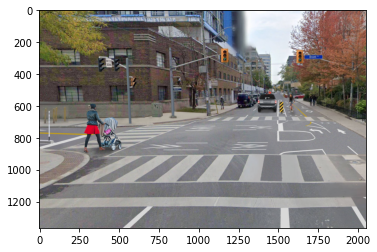

In [6]:
img = cv2.imread('street.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
input_batch = transform(img).to(device)

In [7]:
with torch.no_grad():
    prediction = midas(input_batch)

    prediction = torch.nn.functional.interpolate(
        prediction.unsqueeze(1),
        size=img.shape[:2],
        mode="bicubic",
        align_corners=False,
    ).squeeze()

output = prediction.cpu().numpy()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3613: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode)


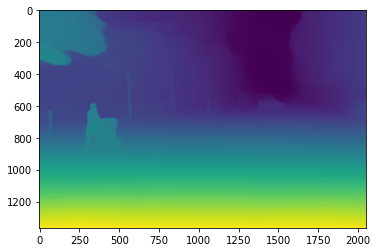

In [8]:
plt.imshow(output)

In [9]:
!pip install pyyaml==5.1
# This is the current pytorch version on Colab. Uncomment this if Colab changes its pytorch version
# !pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
# exit(0)  # After installation, you need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 12.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=792774201c2b1f1de5726d26ebf5920ca77cc1fadfa0dab4505700b726a0c60c
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.9/index.html
     |████████████████████████████████| 6.9 MB 61.8 MB/s 
     |████████████████████████████████| 74 kB 2.9 MB/s 
     |████████████████████████████████| 145 kB 27.9 MB/s 
     |████████████████████████████████| 130 kB 27.4 MB/s 
     |████████████████████████████████| 49 kB 5.6 MB/s 
     |████████████████████████████████| 743 kB 18.8 MB/s 
     |████████████████████████████████| 748 kB 27.7 MB/s 
     |

In [10]:
# check pytorch installation: 
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
assert torch.__version__.startswith("1.9")

1.9.0+cu111 True


In [11]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [12]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(img)

model_final_f10217.pkl: 178MB [00:29, 6.13MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are relea

In [13]:
print(outputs['instances'])

Instances(num_instances=16, image_height=1365, image_width=2048, fields=[pred_boxes: Boxes(tensor([[ 277.1679,  588.5954,  420.8042,  899.3776],
        [1132.8785,  537.6577, 1163.1951,  624.1969],
        [1610.0966,  250.1803, 1656.4358,  335.6230],
        [ 370.1124,  292.6394,  415.4015,  385.9604],
        [1369.9900,  521.1204, 1489.9698,  627.4559],
        [ 470.8039,  301.9682,  505.2612,  385.8663],
        [1691.9037,  535.1918, 1711.4041,  600.0330],
        [1566.4076,  522.8635, 1589.4725,  580.8528],
        [1712.1515,  527.9296, 1737.6881,  599.6566],
        [1338.4366,  529.3436, 1378.4238,  577.6744],
        [ 572.9391,  417.7261,  612.3116,  484.9453],
        [1242.2144,  521.4142, 1347.8799,  613.8417],
        [1141.3323,  241.9236, 1185.8325,  325.6908],
        [1603.7294,  525.1017, 1666.1700,  556.4200],
        [1240.4283,  522.1846, 1348.9487,  613.8906],
        [ 868.0095,  421.1441,  893.2165,  474.2688]], device='cuda:0')), scores: tensor([0.9986, 0

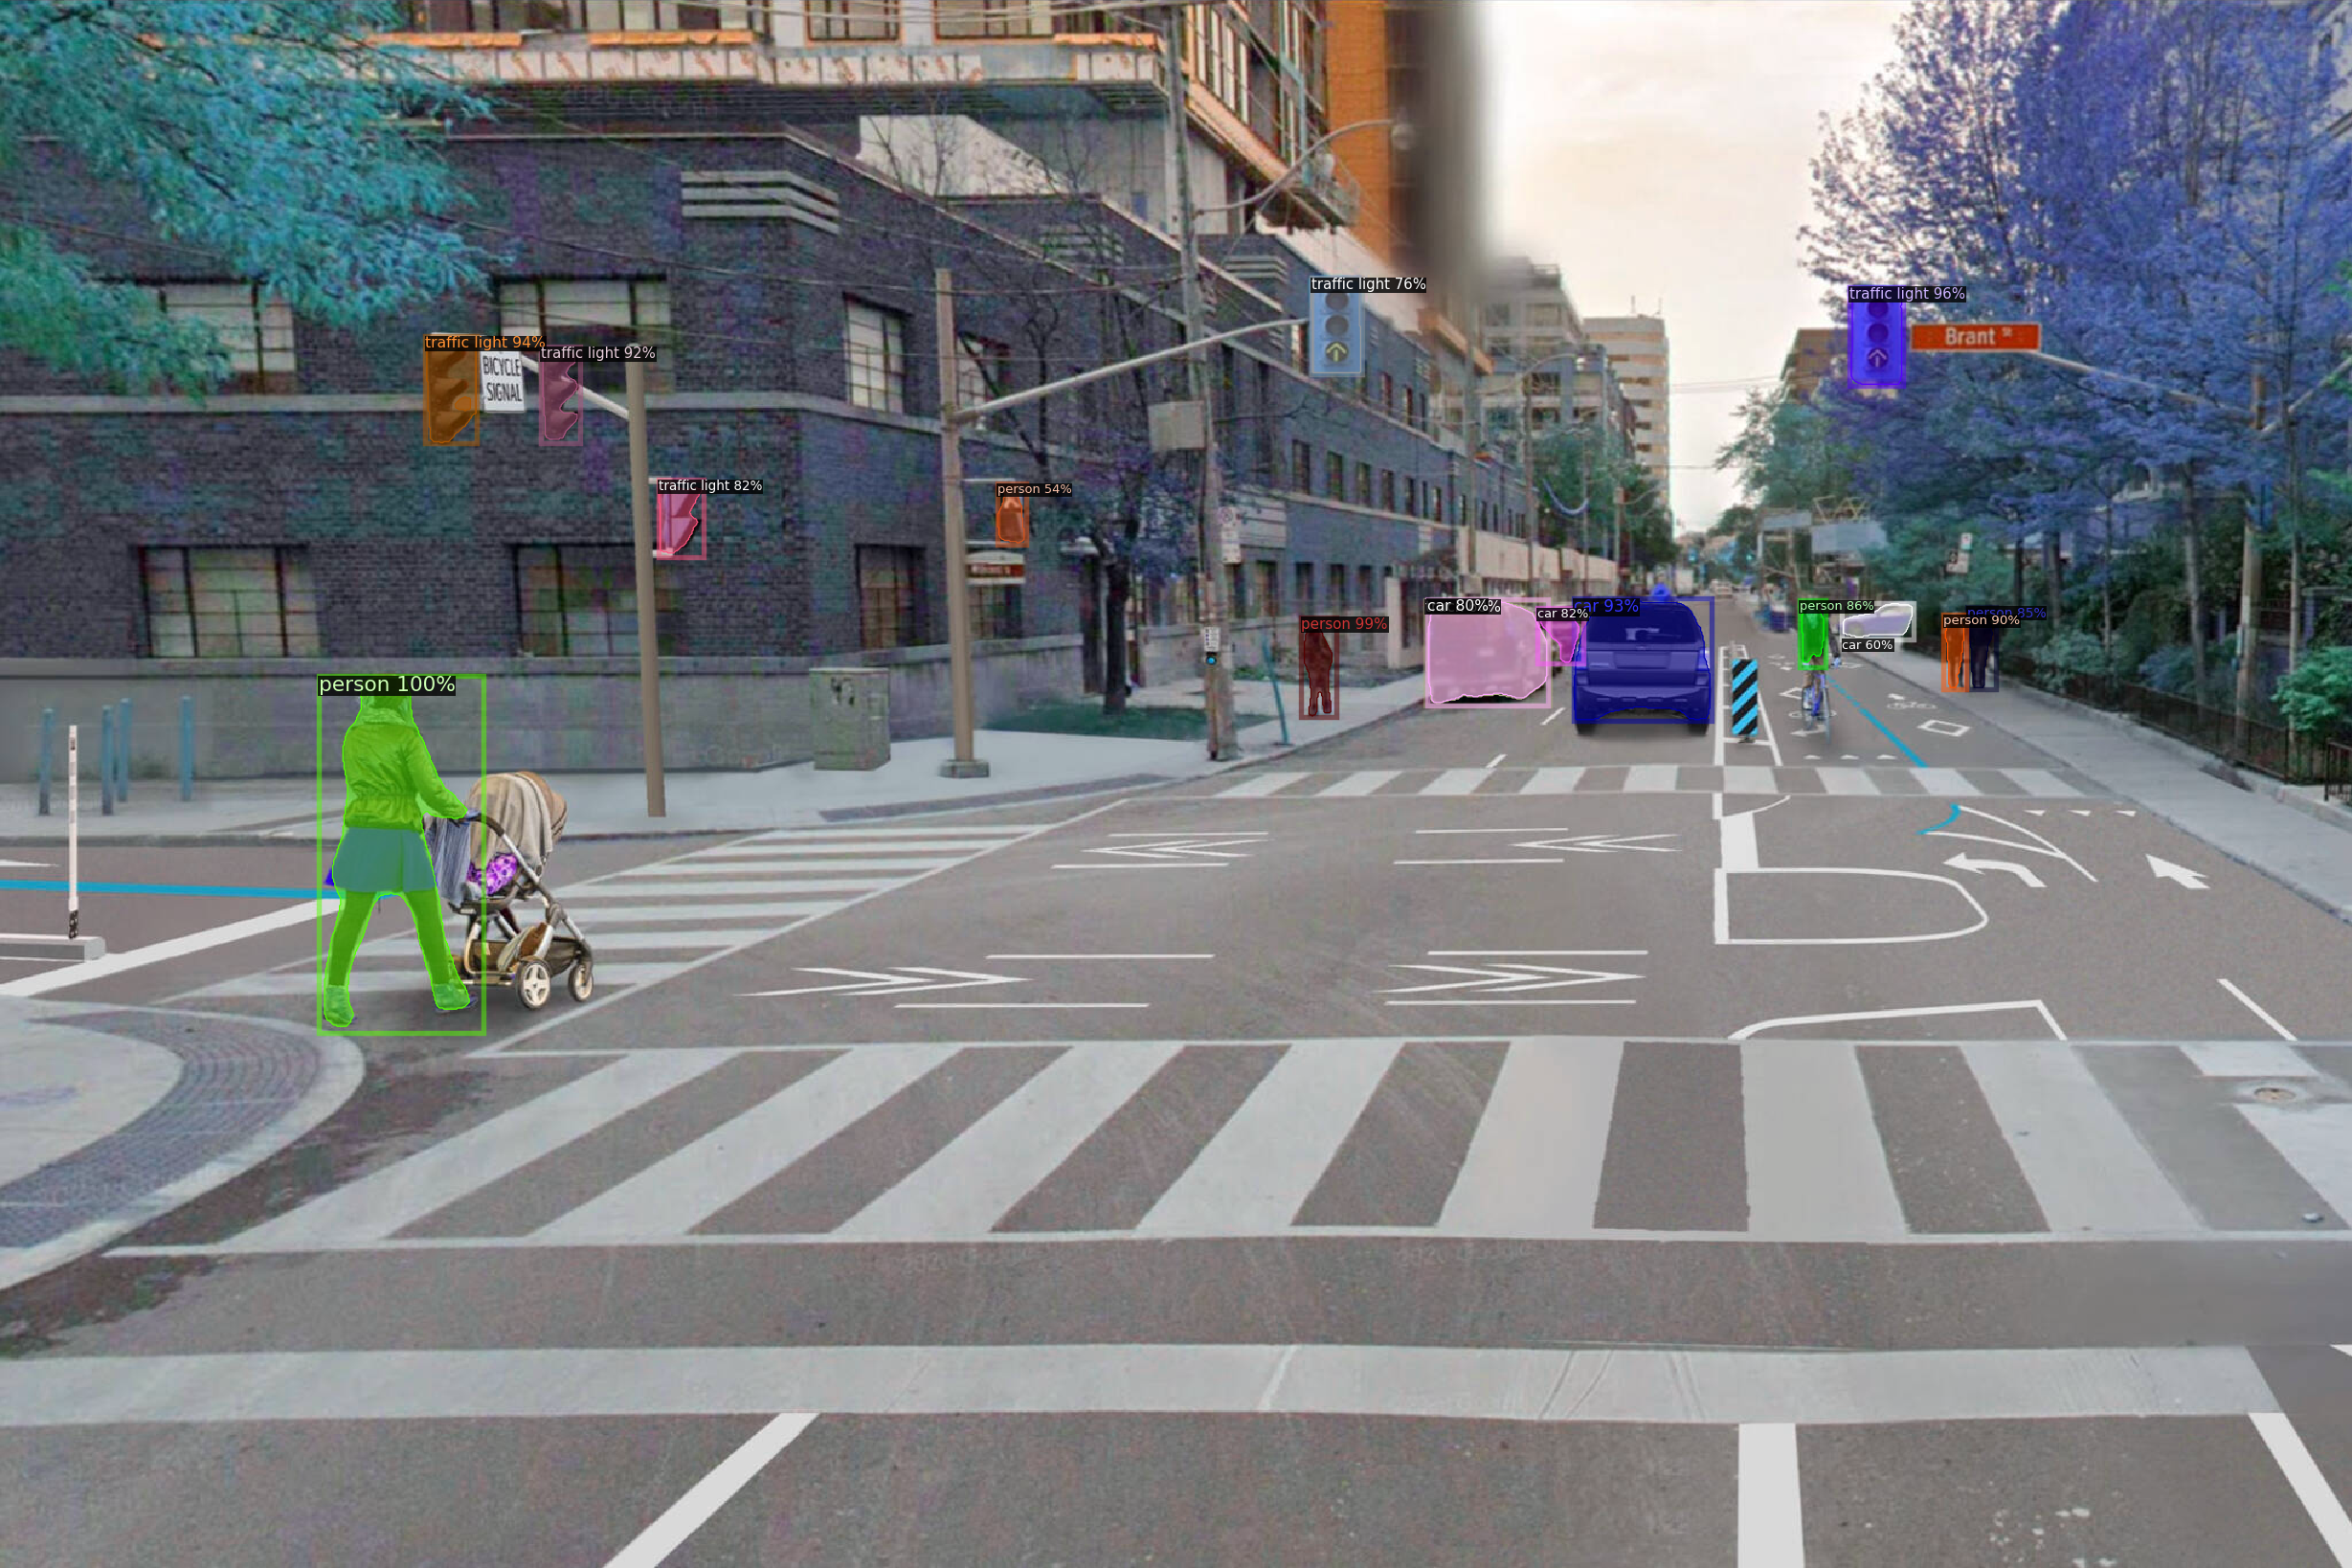

In [14]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

[[21.505733 21.508406 21.51823  ...  8.455211  8.410929  8.399865]
 [21.506609 21.509315 21.519232 ...  8.4639    8.422984  8.412768]
 [21.51092  21.513634 21.523438 ...  8.494761  8.466686  8.459699]
 ...
 [51.32081  51.320633 51.32014  ... 51.13286  51.14267  51.145535]
 [51.335285 51.33523  51.334965 ... 51.176506 51.185295 51.188072]
 [51.341686 51.341606 51.341167 ... 51.189014 51.197517 51.200256]]


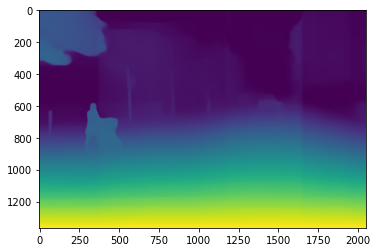

In [15]:
from sklearn.preprocessing import MinMaxScaler
print(output)
scaler = MinMaxScaler(feature_range = (-1,1))
depth = scaler.fit_transform(output)
plt.imshow(depth)

In [16]:
img.shape

(1365, 2048, 3)

In [17]:
pred_masks = outputs['instances'].pred_masks.cpu().numpy()
labels = outputs['instances'].pred_classes.cpu().numpy()
axis = outputs['instances'].pred_boxes
max = -1000000000
maxi = 0
for i , mask in enumerate(pred_masks):
  d = np.sum(output[mask])
  if d > max:
    max = d 
    maxi = i

print(max,' ',maxi,' ',labels[maxi],' ',list(axis[maxi].__iter__())[0] )

433869.06   0   0   tensor([277.1679, 588.5954, 420.8042, 899.3776], device='cuda:0')


In [18]:
text = []
def left_rigth (x):
  limit = img.shape[1]/2
  if x > limit:
    text.append('left')
    print('left')
  else:
    text.append('rigth')
    print('rigth')

left_rigth(list(axis[maxi].__iter__())[0][0])

rigth


In [19]:
Carmax = -1000000000
Carmaxi = 0
if 2 not in labels:
  print("Not Car")
else:
  for i , mask in enumerate(pred_masks):
    if labels[i] == 2:
      d = np.sum(output[mask])
      if d > Carmax:
        Carmax = d 
        Carmaxi = i
  print(Carmax,' ',Carmaxi,' ',labels[Carmaxi],' ',list(axis[Carmaxi].__iter__())[0] )

49184.6   4   2   tensor([1369.9900,  521.1204, 1489.9698,  627.4559], device='cuda:0')


In [20]:
left_rigth(list(axis[Carmaxi].__iter__())[0][0])

left


In [21]:
def near (depth):
  if depth > 10:
    text.append(' and near')
    print("near")
  else:
    text.append(' and not near')
    print("not near")

near(max)
near(Carmax)

near
near


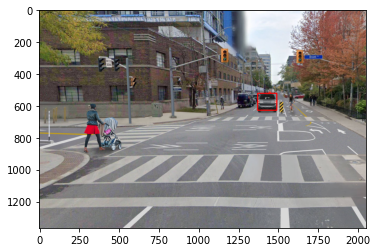

In [22]:
color = (255, 0, 0)
x1,y1 , x2,y2 = list(axis[Carmaxi].__iter__())[0][0] , list(axis[Carmaxi].__iter__())[0][1], list(axis[Carmaxi].__iter__())[0][2],list(axis[Carmaxi].__iter__())[0][3]
nearest_car = cv2.rectangle(img, (x1,y1), (x2,y2), color, 5)
plt.imshow( nearest_car) 

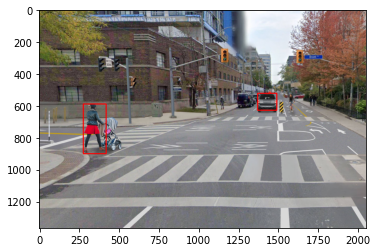

In [23]:
color = (255, 0, 0)
x1,y1 , x2,y2 = list(axis[maxi].__iter__())[0][0] , list(axis[maxi].__iter__())[0][1], list(axis[maxi].__iter__())[0][2],list(axis[maxi].__iter__())[0][3]
nearest_object = cv2.rectangle(img, (x1,y1), (x2,y2), color, 5)
plt.imshow( nearest_object) 

In [24]:
!pip install gTTS

In [30]:
from gtts  import gTTS
from IPython.display import display,Audio

myobj = gTTS(text=str(text), lang='en', slow=False)
myobj.save("near.mp3")
display(Audio("near.mp3",autoplay=True))